In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import statistics as st
from datetime import datetime
from matplotlib.pylab import rcParams
import warnings;
warnings.simplefilter("ignore")

In [16]:
rcParams["figure.figsize"] = 20, 10



data = pd.read_excel("Exc.xlsx", index_col=0)
data.index.freq = "Q"




In [3]:
#Werbeumsätze von Google in den Jahren 2001 bis 2020 (in Milliarden US-Dollar)
data

,Umsatz
Time,
2007-09-30,5
2007-12-31,118
2008-03-31,241
2008-06-30,378
2008-09-30,419
2008-12-31,806
2009-03-31,2940
2009-06-30,2427
2009-09-30,3060


In [112]:
#save for the paper
data.to_html("table")

# Data Exploration

In [4]:
#describe the data
data.describe()

,Umsatz
count,55.000000
mean,23669.927273
std,17091.490627
min,5.000000
25%,9530.500000
50%,24048.000000
75%,32353.500000
max,65597.000000


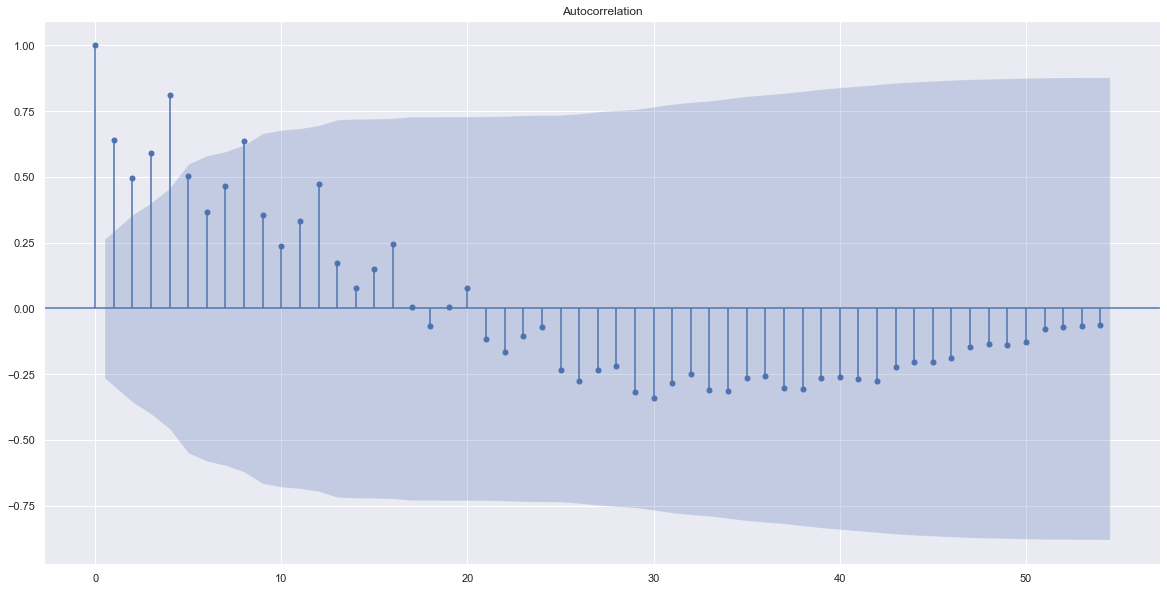

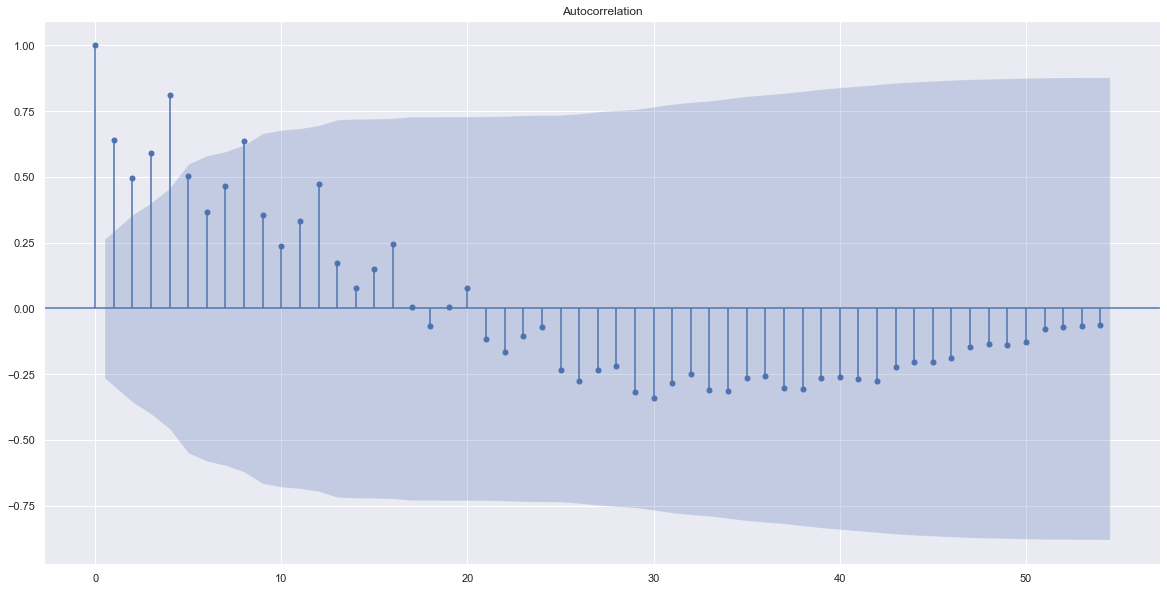

In [26]:
#visual stationarity check
from statsmodels.graphics.tsaplots import plot_acf
sns.set()
plot_acf(data, lags = 54)

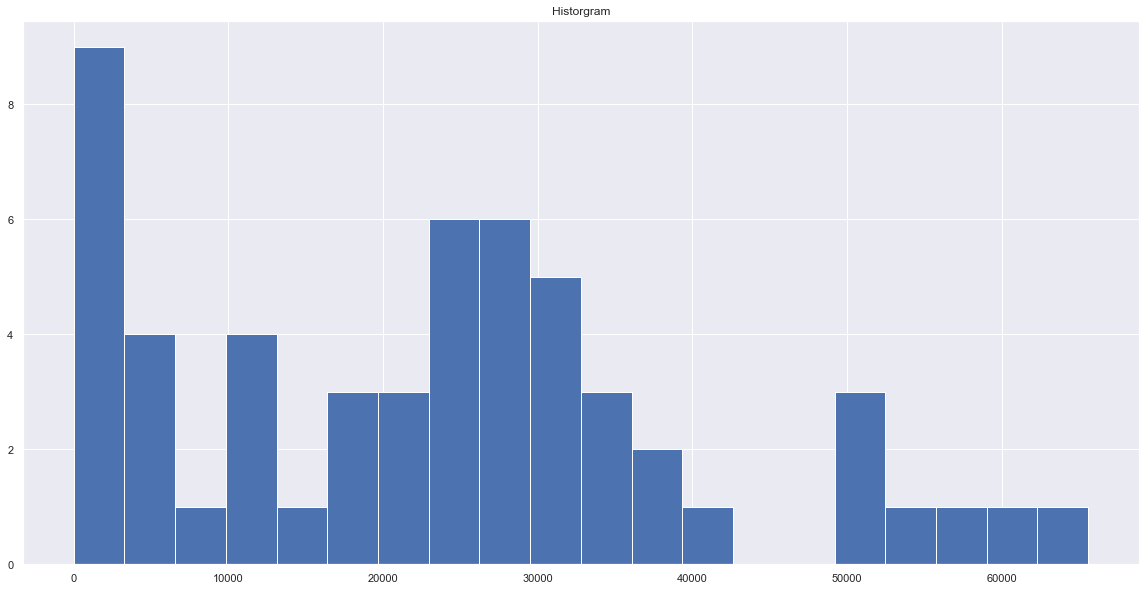

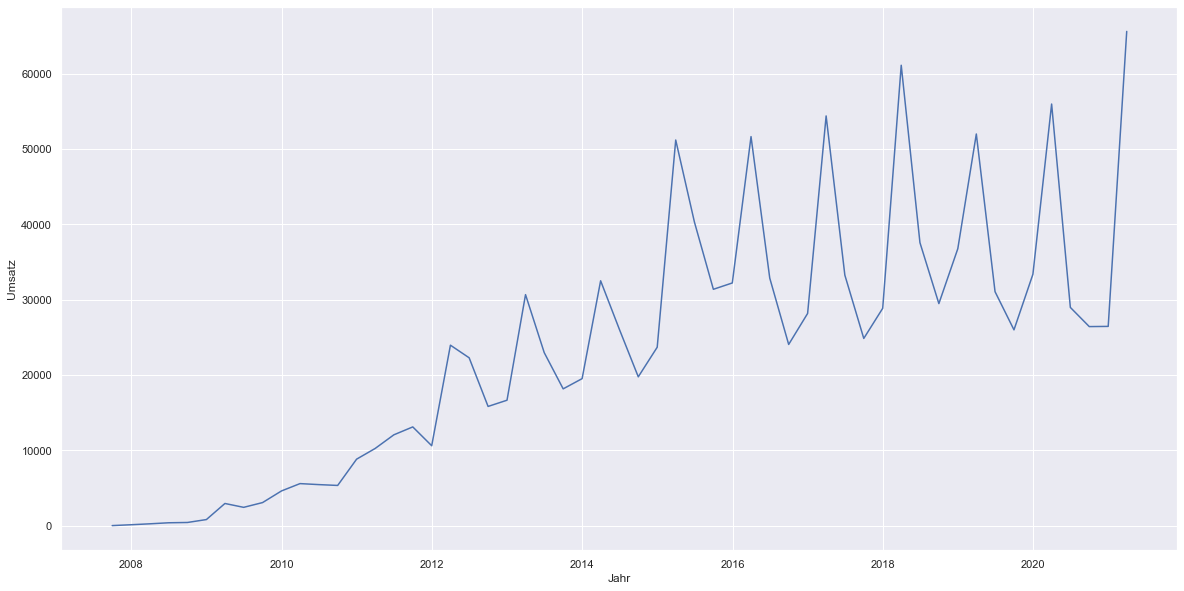

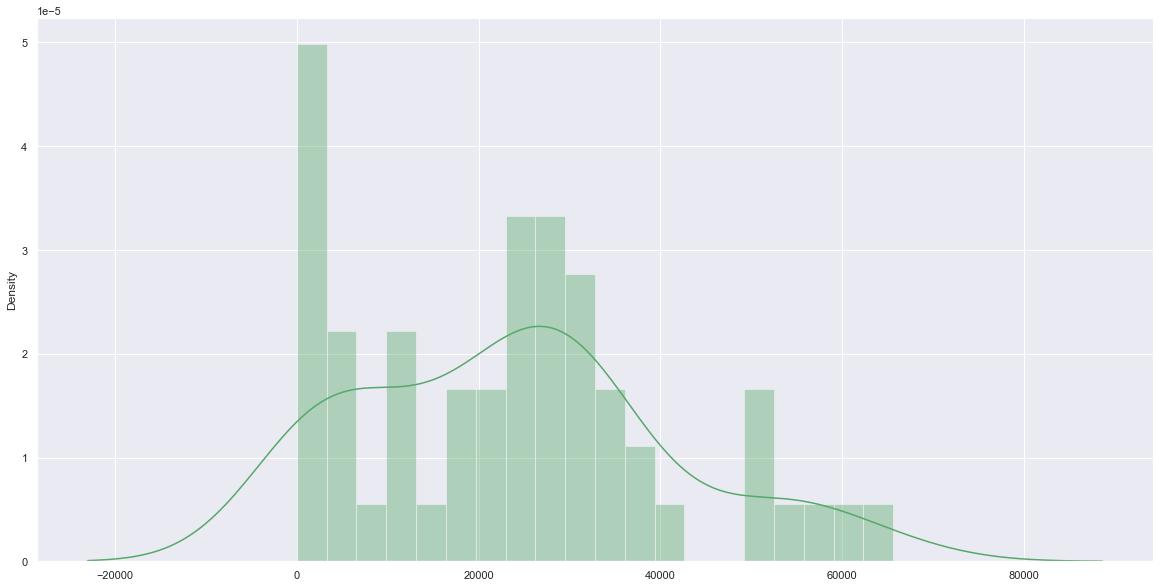

In [58]:
#histogram
sns.set()
data.hist(bins = 20)
plt.title("Historgram")
plt.savefig("Hist")
plt.show()

#plot
plt.ylabel("Umsatz")
plt.xlabel("Jahr")
plt.plot(data)
plt.savefig("Trend")




#distribution
fig, ax = plt.subplots()
sns.distplot(data, bins=20, color="g", ax=ax)
plt.savefig("Dist")
plt.show()

In [9]:
#determing rolling statistics
rolmean = data.rolling(window=12).mean()

rolstd = data.rolling(window=12).std()
print(rolmean, rolstd)

                  Umsatz
Time                    
2007-09-30           NaN
2007-12-31           NaN
2008-03-31           NaN
2008-06-30           NaN
2008-09-30           NaN
2008-12-31           NaN
2009-03-31           NaN
2009-06-30           NaN
2009-09-30           NaN
2009-12-31           NaN
2010-03-31           NaN
2010-06-30   2168.583333
2010-09-30   2612.666667
2010-12-31   3338.000000
2011-03-31   4171.166667
2011-06-30   5144.083333
2011-09-30   6201.000000
2011-12-31   7017.500000
2012-03-31   8768.333333
2012-06-30  10422.416667
2012-09-30  11485.833333
2012-12-31  12489.083333
2013-03-31  14579.250000
2013-06-30  16038.416667
2013-09-30  17106.750000
2013-12-31  17997.416667
2014-03-31  19852.333333
2014-06-30  21019.916667
2014-09-30  21574.000000
2014-12-31  22663.500000
2015-03-31  24932.833333
2015-06-30  26433.333333
2015-09-30  27728.916667
2015-12-31  29025.916667
2016-03-31  30773.833333
2016-06-30  31599.000000
2016-09-30  32090.166667
2016-12-31  32811.000000


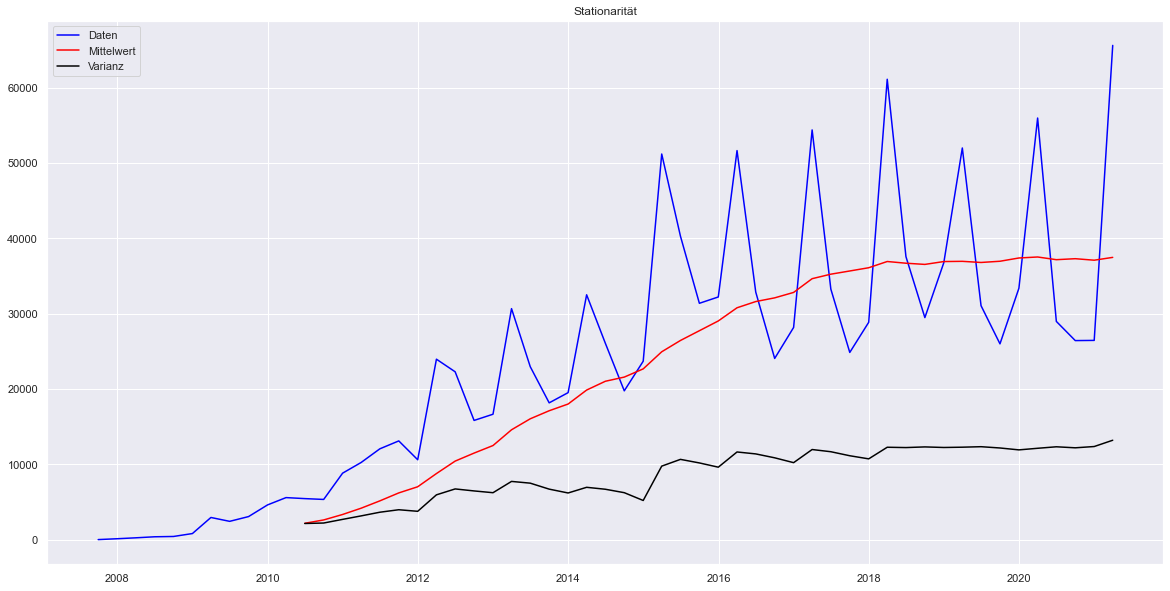

In [59]:
#Plot rolling statistics:
orig = plt.plot(data, color="blue", label="Daten")
mean = plt.plot(rolmean, color="red", label="Mittelwert")
std = plt.plot(rolstd, color="black", label="Varianz")
plt.legend(loc="best")
plt.title("Stationarität")
plt.show(block=False)

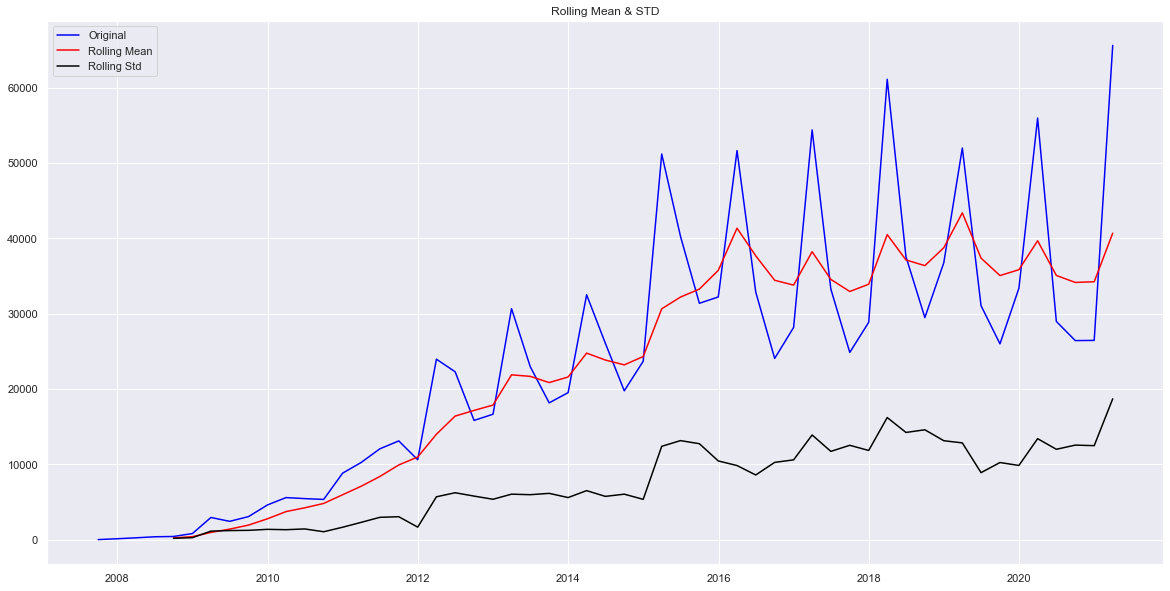

Results of Dickey-Fuller Test:
Test Statistics                -1.496617
p-value                         0.535184
#Lags Used                      4.000000
Numbers of Observation Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


In [60]:
#Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=5).mean()
    movingSTD = timeseries.rolling(window=5).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color="blue", label = "Original")
    mean = plt.plot(movingAverage, color="red", label = "Rolling Mean")
    std = plt.plot(movingSTD, color="black", label = "Rolling Std")
    plt.legend(loc="best")
    plt.title("Rolling Mean & STD")
    plt.show(block=False)
    
#     #Stationarity statistics:
#     plot_acf(timeseries, color="blue")
#     plt.show(block=False)
    
    
    #Perform Dickey-Fuller test:
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries["Umsatz"], autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistics", "p-value", "#Lags Used", "Numbers of Observation Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)" %key] = value
    print(dfoutput)
    
    

test_stationarity(data)

In [14]:
from pmdarima.arima.utils import ndiffs

# Estimate the number of differences using an ADF test:
n_adf = ndiffs(data, test='adf')
n_adf

1

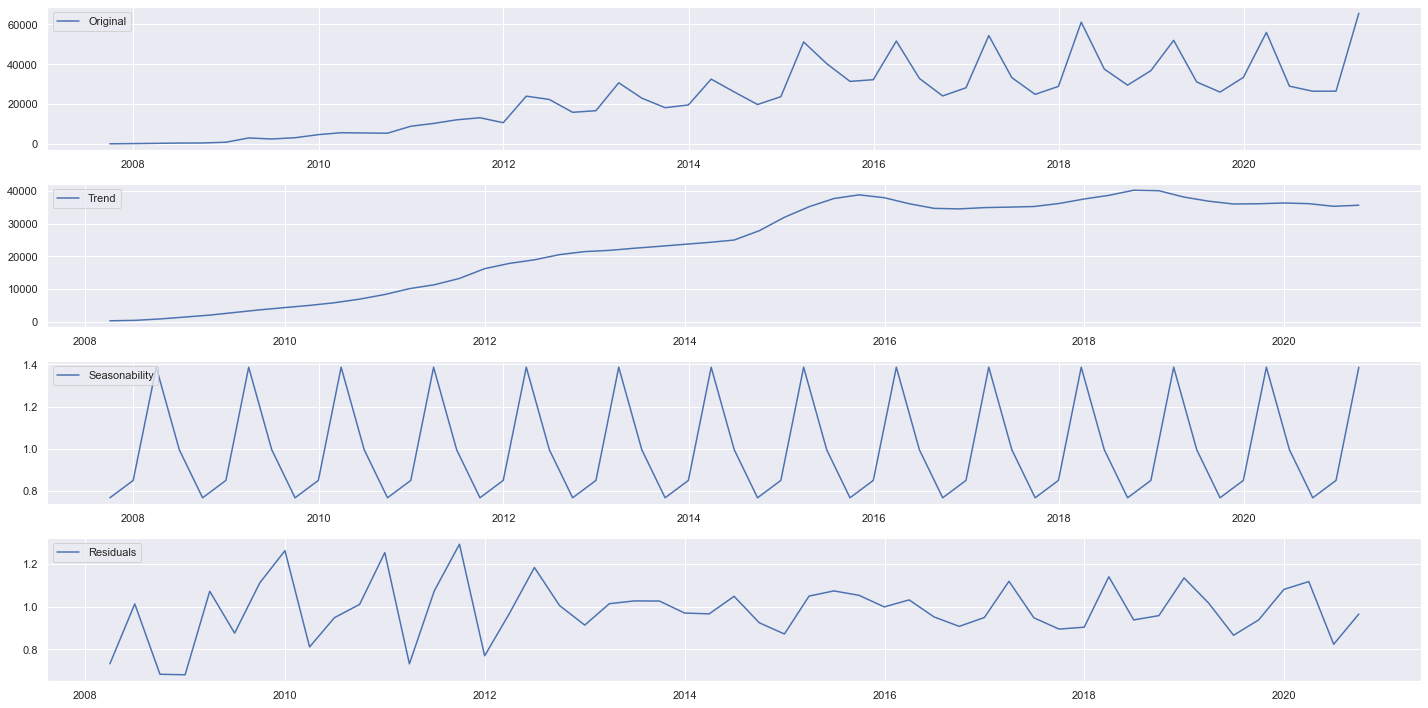

In [45]:
#check for trend, seasonality, residuals
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data, model = "multiplicative")

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data, label="Original")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(seasonal, label="Seasonability")
plt.legend(loc="upper left")
plt.subplot(414)
plt.plot(residual, label="Residuals")
plt.legend(loc="upper left")
plt.tight_layout()



In [27]:
first_diff = data.diff()[1:]

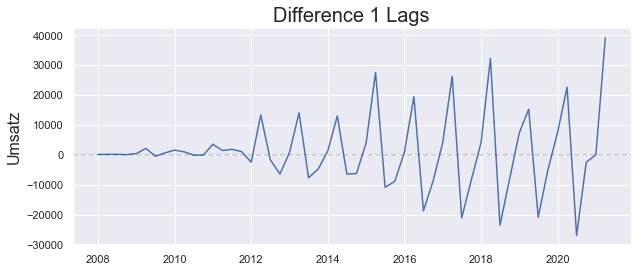

In [28]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Difference 1 Lags', fontsize=20)
plt.ylabel('Umsatz', fontsize=16)

plt.axhline(0, color='k', linestyle='--', alpha=0.2)

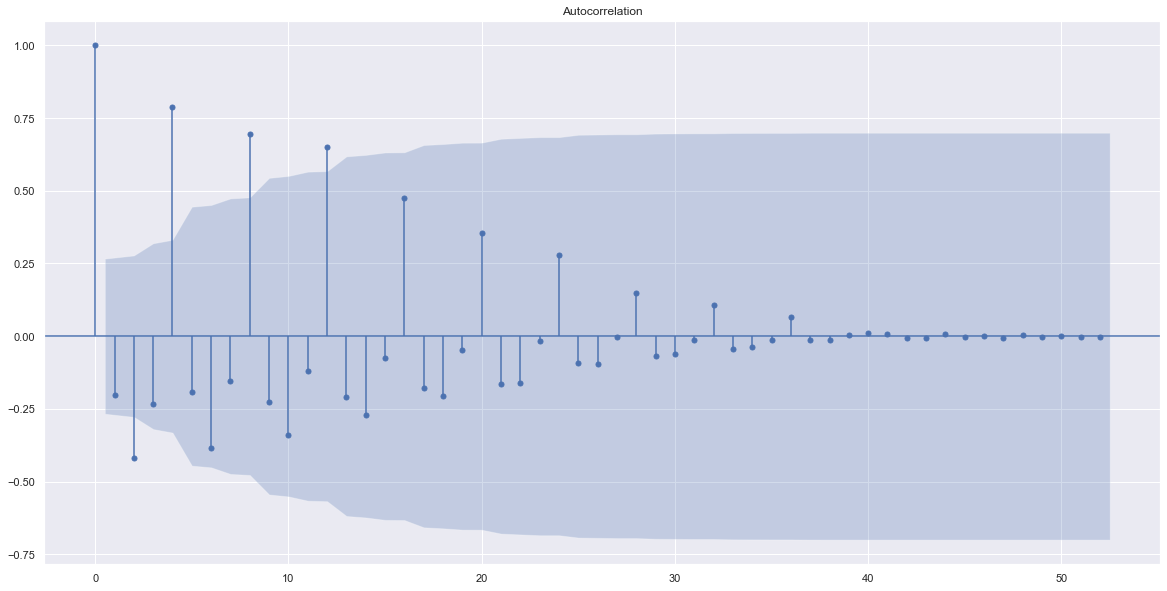

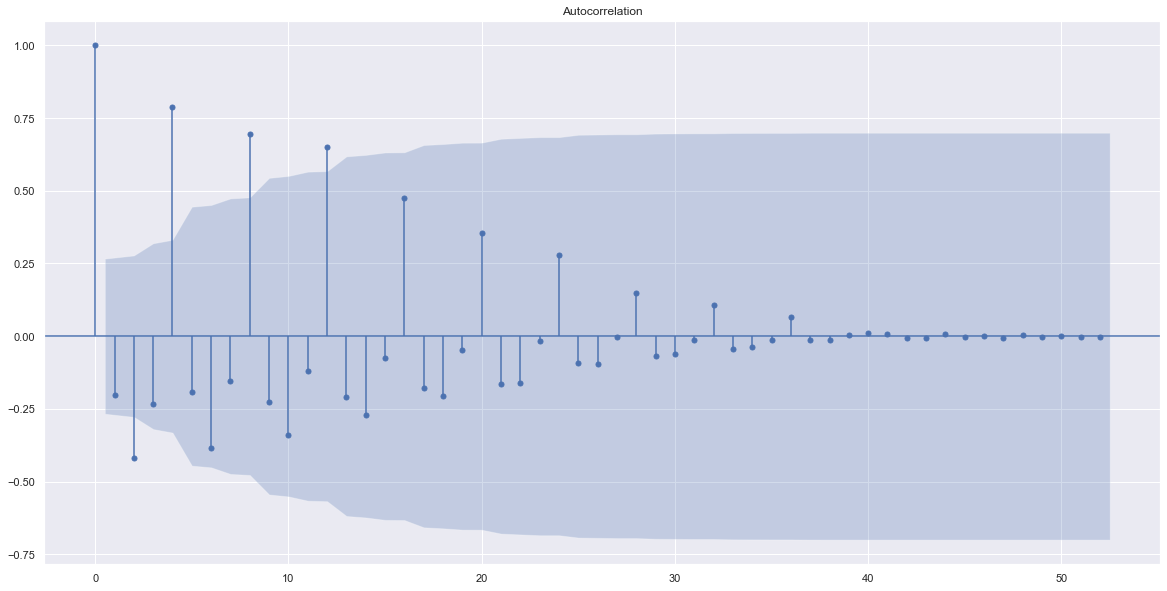

In [31]:
plot_acf(first_diff, lags = 52)

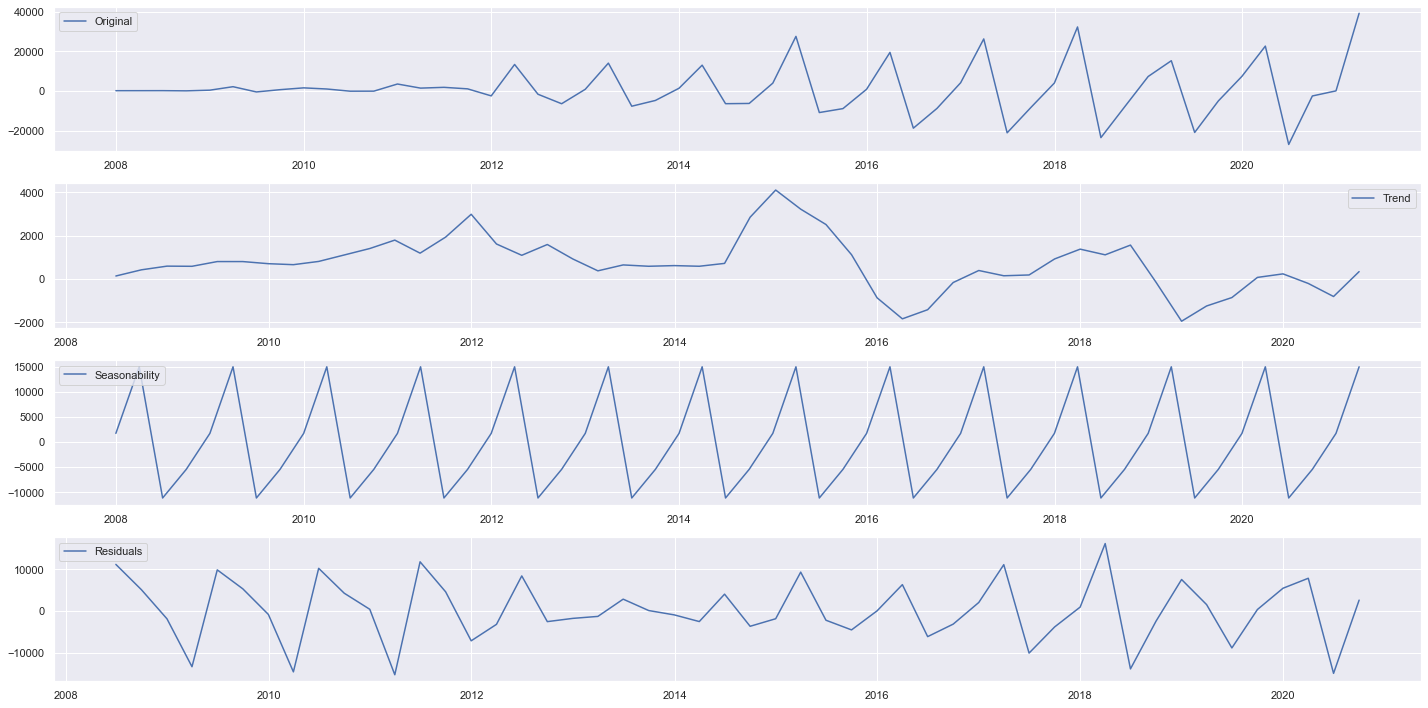

In [47]:
decomposition = seasonal_decompose(first_diff)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(first_diff, label="Original")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(seasonal, label="Seasonability")
plt.legend(loc="upper left")
plt.subplot(414)
plt.plot(residual, label="Residuals")
plt.legend(loc="upper left")
plt.tight_layout()

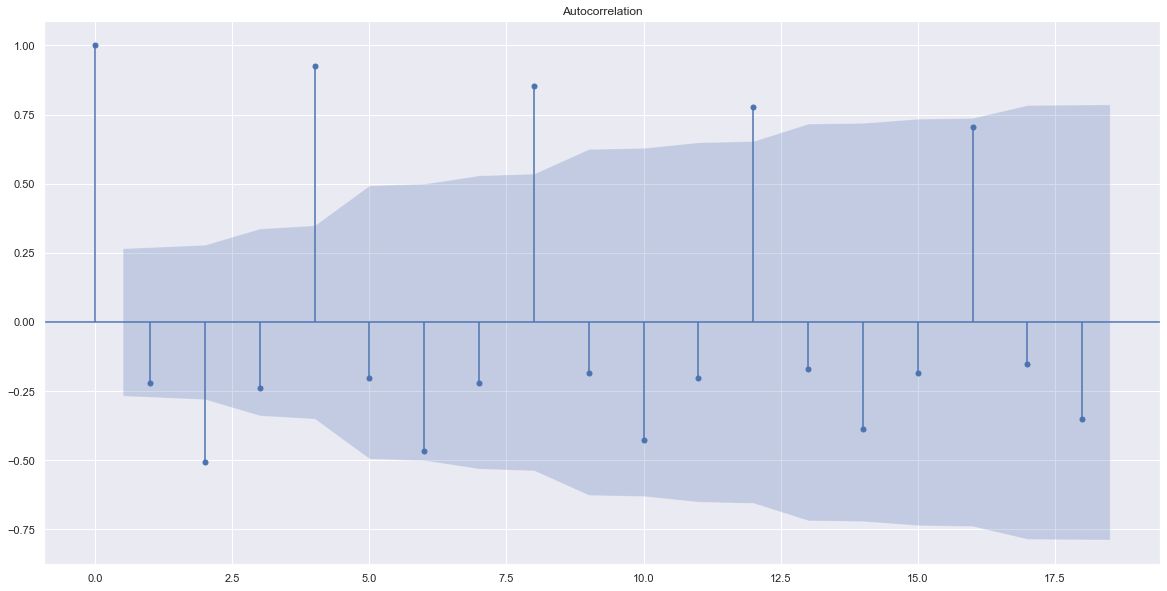

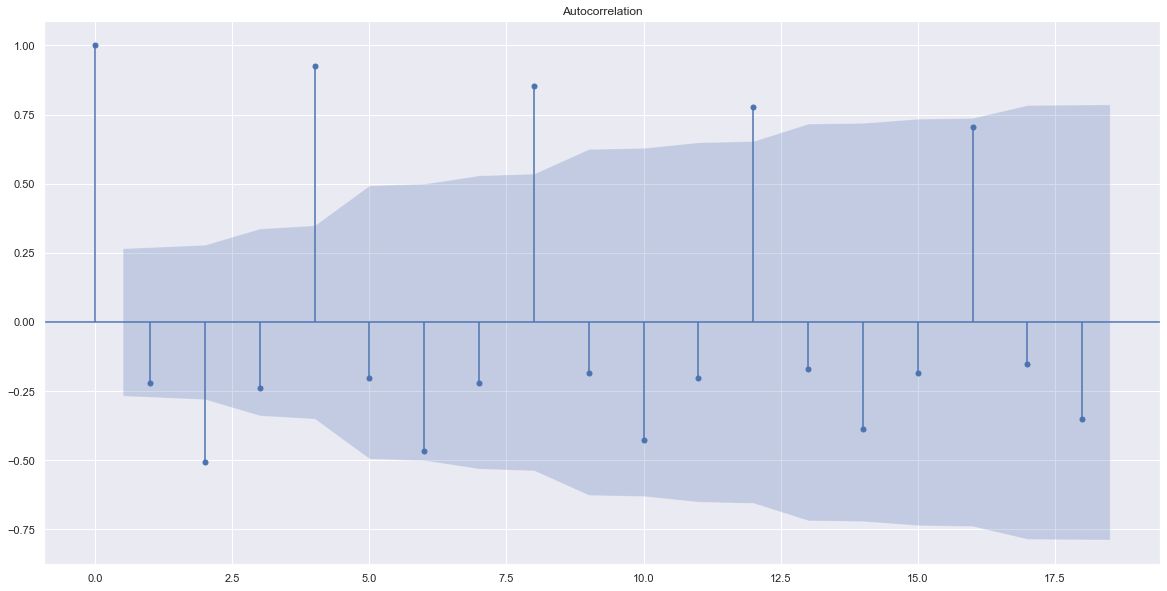

In [50]:
plot_acf(seasonal)

In [51]:
data_log = np.log(data)

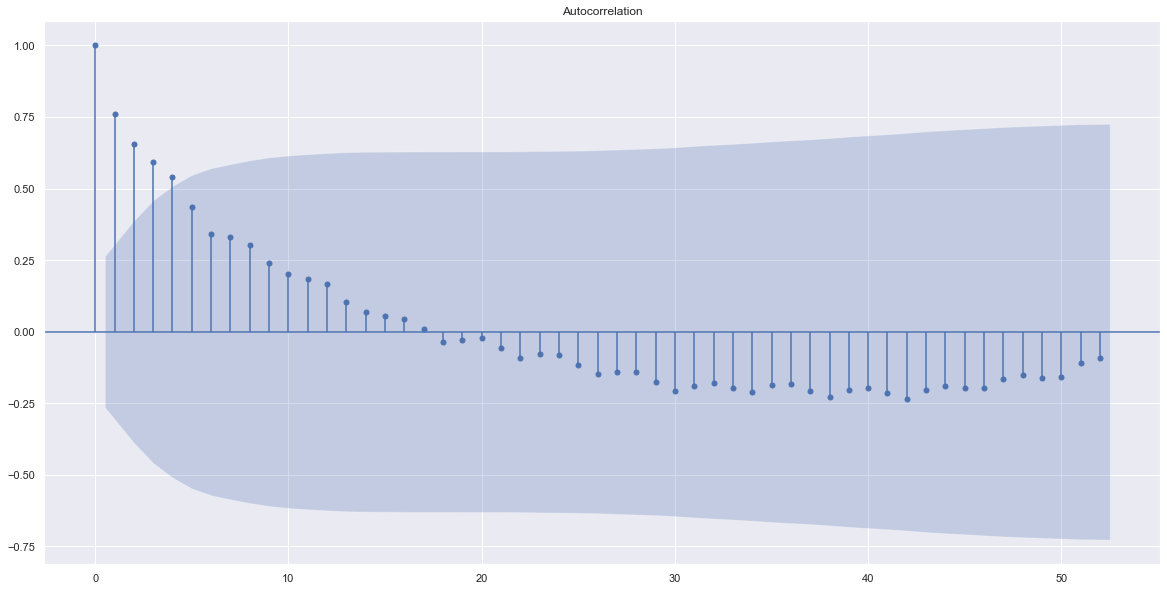

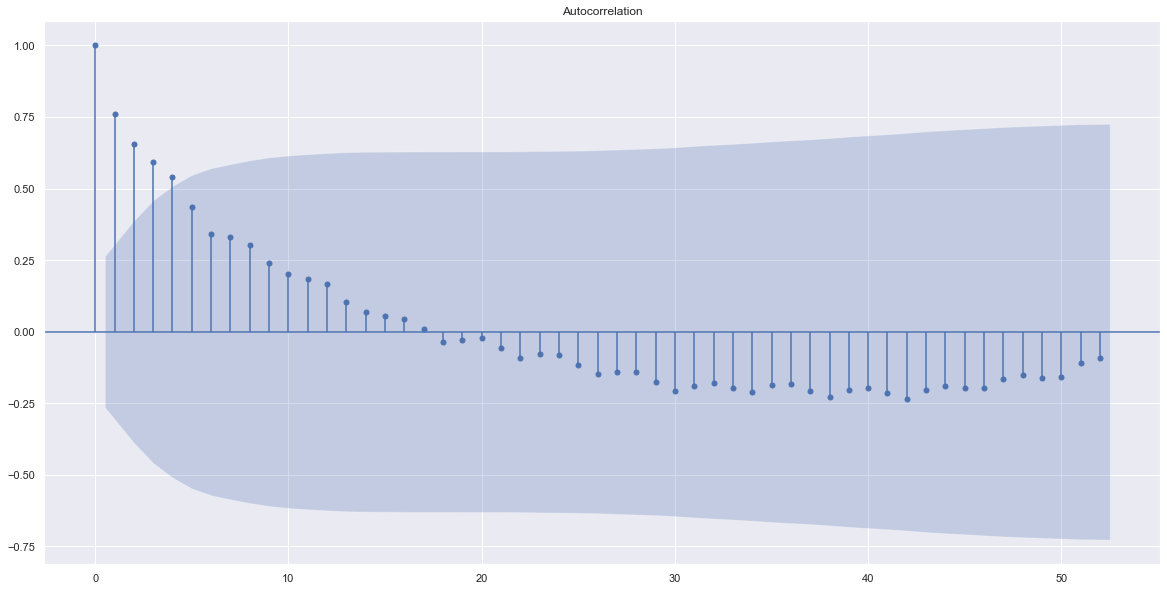

In [52]:
plot_acf(data_log, lags = 52)

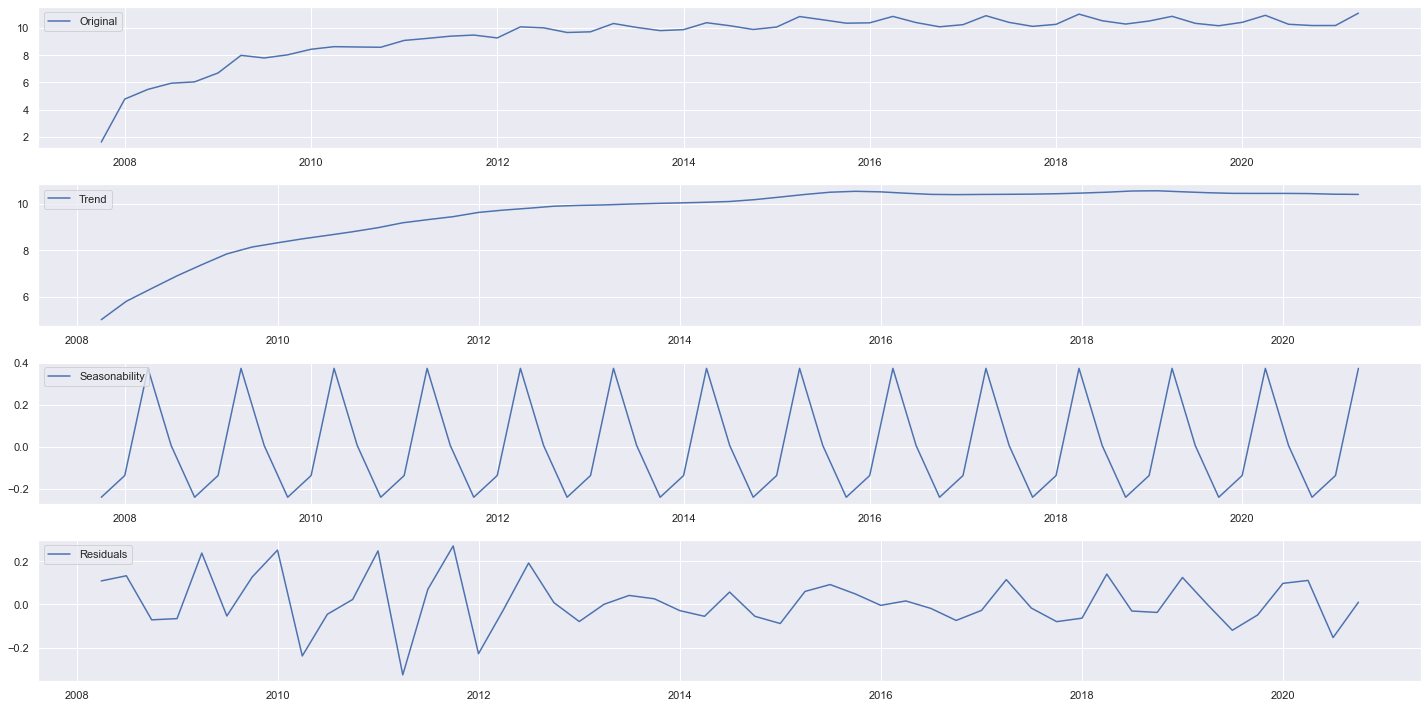

In [55]:
decomposition = seasonal_decompose(data_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data_log, label="Original")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(seasonal, label="Seasonability")
plt.legend(loc="upper left")
plt.subplot(414)
plt.plot(residual, label="Residuals")
plt.legend(loc="upper left")
plt.tight_layout()

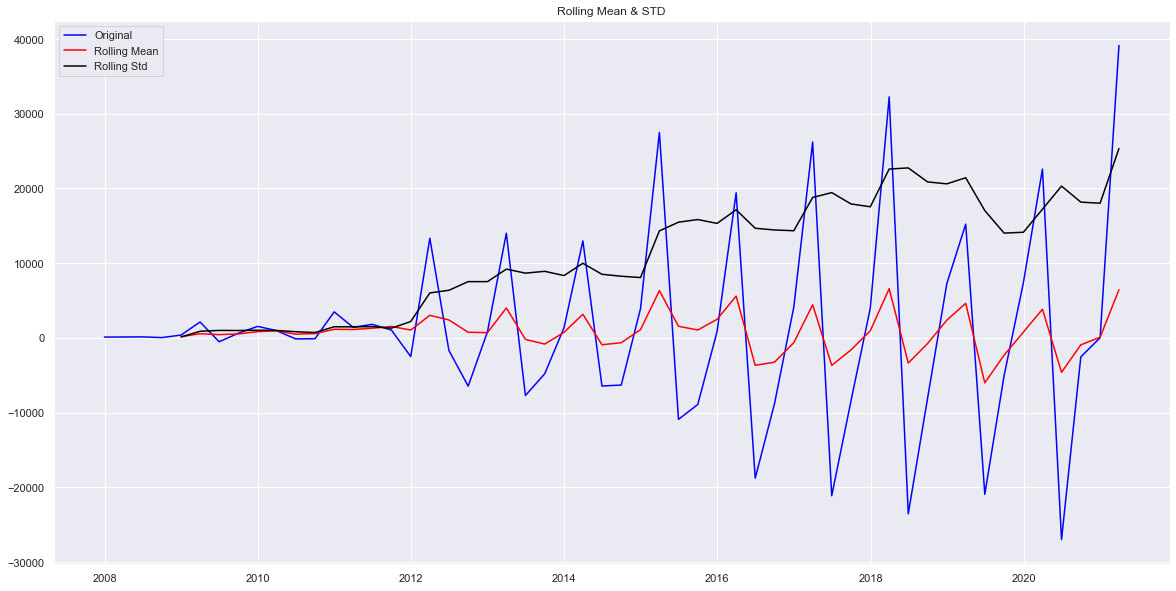

Results of Dickey-Fuller Test:
Test Statistics                -3.593948
p-value                         0.005878
#Lags Used                      3.000000
Numbers of Observation Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


In [62]:
#Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=5).mean()
    movingSTD = timeseries.rolling(window=5).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color="blue", label = "Original")
    mean = plt.plot(movingAverage, color="red", label = "Rolling Mean")
    std = plt.plot(movingSTD, color="black", label = "Rolling Std")
    plt.legend(loc="best")
    plt.title("Rolling Mean & STD")
    plt.show(block=False)
    
#     #Stationarity statistics:
#     plot_acf(timeseries, color="blue")
#     plt.show(block=False)
    
    
    #Perform Dickey-Fuller test:
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries["Umsatz"], autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistics", "p-value", "#Lags Used", "Numbers of Observation Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)" %key] = value
    print(dfoutput)
    
    

test_stationarity(first_diff)

<AxesSubplot:ylabel='Density'>

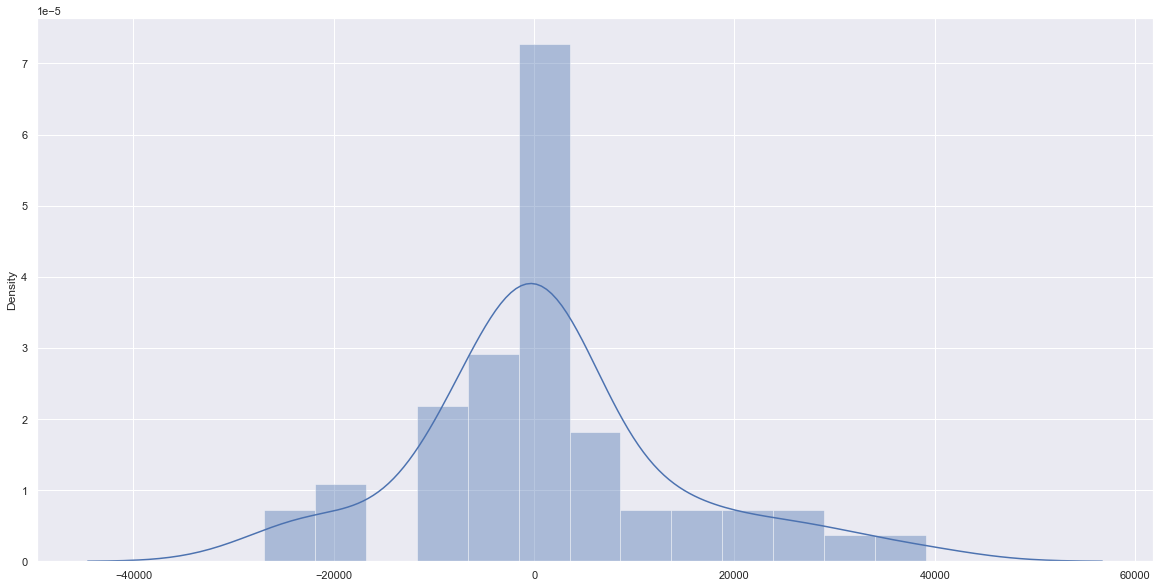

In [100]:
sns.distplot(first_diff)

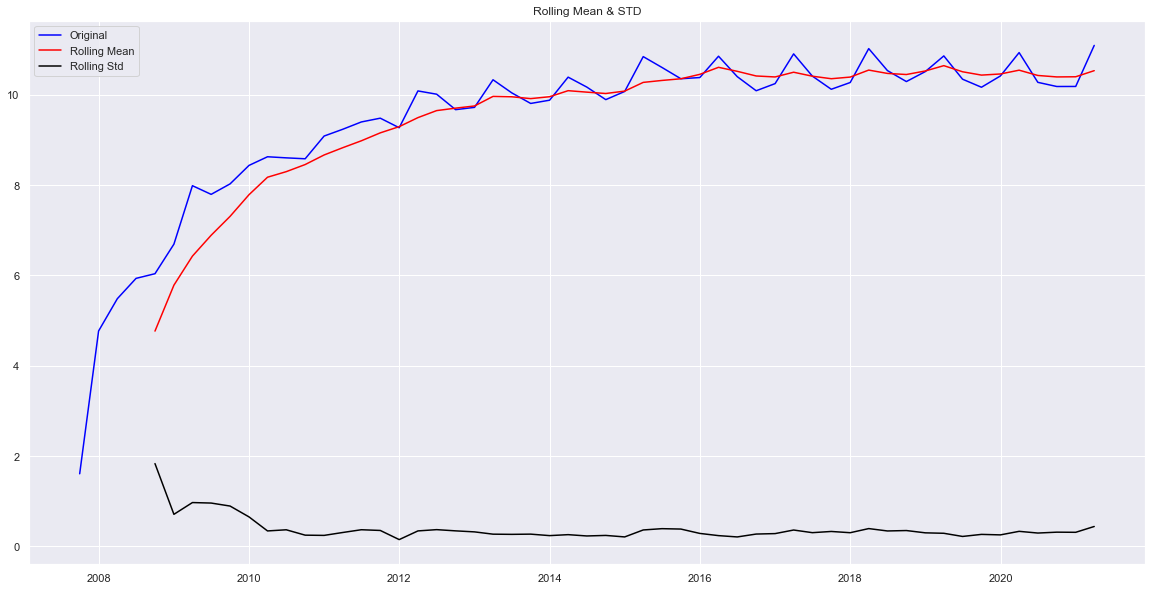

Results of Dickey-Fuller Test:
Test Statistics                -3.836469
p-value                         0.002555
#Lags Used                     11.000000
Numbers of Observation Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


In [63]:
#Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=5).mean()
    movingSTD = timeseries.rolling(window=5).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color="blue", label = "Original")
    mean = plt.plot(movingAverage, color="red", label = "Rolling Mean")
    std = plt.plot(movingSTD, color="black", label = "Rolling Std")
    plt.legend(loc="best")
    plt.title("Rolling Mean & STD")
    plt.show(block=False)
    
#     #Stationarity statistics:
#     plot_acf(timeseries, color="blue")
#     plt.show(block=False)
    
    
    #Perform Dickey-Fuller test:
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries["Umsatz"], autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistics", "p-value", "#Lags Used", "Numbers of Observation Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)" %key] = value
    print(dfoutput)
    
    

test_stationarity(data_log)

<AxesSubplot:ylabel='Density'>

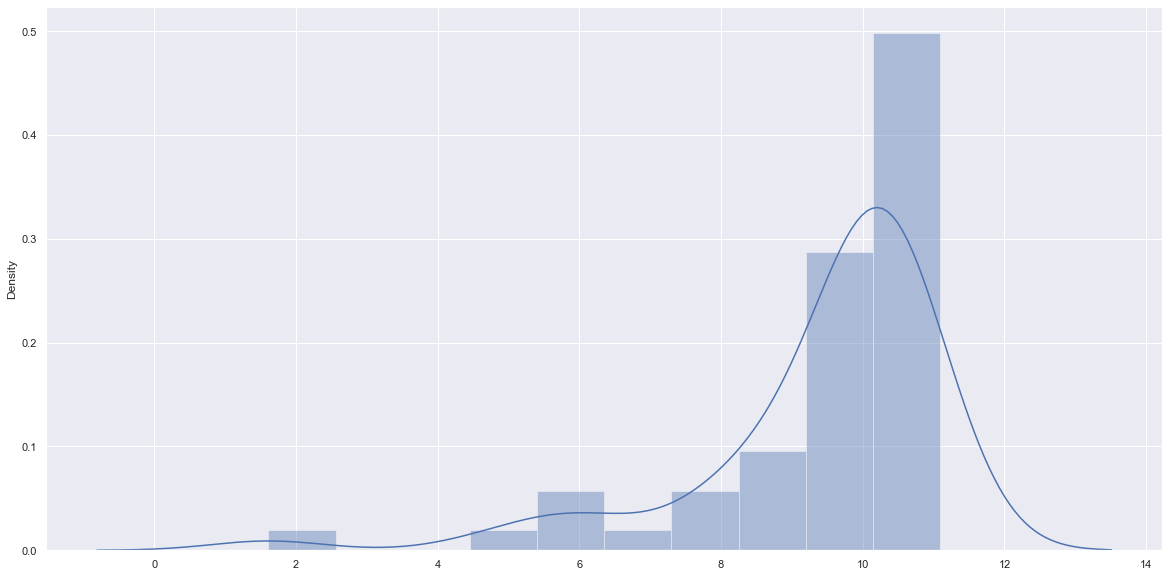

In [101]:
sns.distplot(data_log, bins = 10)